# ABS Detailed Labour Force 6291

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from plotting import (
    finalise_plot,
    set_chart_dir,
    recalibrate_series,
    clear_chart_dir,
)
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    get_identifier,
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use("ggplot")

In [2]:
catalogue_id = "6291"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# --- monthly
abs_m = get_ABS_meta_and_data(catalogue_id)
if abs_m is None:
    sys.exit(-1)
meta_m = abs_m[META_DATA]
RECENT_M, plot_times, plot_tags = get_plot_constants(meta_m)

# --- quarterly
abs_q = get_ABS_meta_and_data(catalogue_id, 2)
if abs_q is None:
    sys.exit(-1)
meta_q = abs_q[META_DATA]
RECENT_Q, plot_times_q, plot_tags_q = get_plot_constants(meta_q)

Found URL for a ZIP file on ABS web page
We need to download this file from the ABS ...
Saving ABS download to cache.
Extracting DataFrames from the zip-file ...
Found URL for a ZIP file on ABS web page
We need to download this file from the ABS ...
Saving ABS download to cache.
Extracting DataFrames from the zip-file ...


## Plot

In [4]:
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

### Monthly by Age

In [5]:
table = "01"
data = abs_m[table]
series_type = "Original"

ages = [
    "15-24 years",
    "25-34 years",
    "35-44 years",
    "45-54 years",
    "55-64 years",
]

TOKEN = "By Age"
plots = [
    f"> {TOKEN} ;  Participation rate ;  Persons ;",
    f"> {TOKEN} ;  Unemployment rate ;  Persons ;",
]

for plot in plots:
    idents = []
    for age in ages:
        desc = plot.replace(TOKEN, age)
        ident, units = get_identifier(meta_m, desc, series_type, table)
        idents.append(ident)

    for start, tag in zip(plot_times, plot_tags):
        df = (
            data[data.index >= pd.Period(start, freq=data.index.freq)]
            if start
            else data
        )
        ax = df[idents].plot(lw=2)
        ax.legend(ages, loc="best")
        title = f"Australia: {plot}"
        finalise_plot(
            ax,
            title=title,
            ylabel=units,
            tag=tag,
            rfooter=f"{source} {table}",
            lfooter=f"{series_type.capitalize()} series",
            # show=True,
        )

### Quarterly by sector

In [6]:
table = "04"
data_table = abs_q[table]
series_type = "Seasonally Adjusted"
selection = meta_q[(meta_q["Series Type"] == series_type) & (meta_q["Table"] == table)]

for index, series in selection.iterrows():
    title = series["Data Item Description"].replace(" ;", "").replace("  ", " ")
    id = series["Series ID"]
    units = series["Unit"]
    data = data_table[id]
    data, units = recalibrate_series(data, units)
    tag = "all"
    ax = data.plot(lw=2)
    finalise_plot(
        ax,
        title=title,
        ylabel=units,
        tag=tag,
        rfooter=f"{source} {table}",
        lfooter=f"{series_type.capitalize()} series",
        # show=True,
    )
    plt.close()

### Duration of unemployment

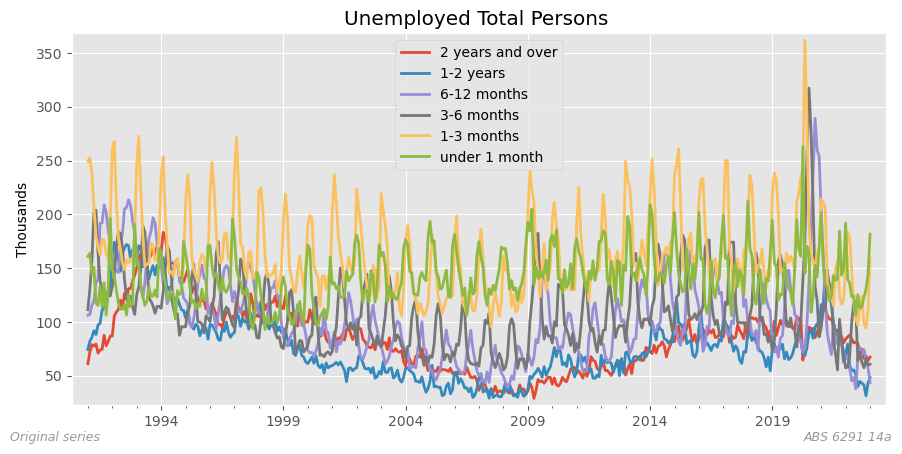

In [7]:
table = "14a"
df = abs_m[table]
series_type = "Original"

cohorts = [
    "2 years and over",
    "1-2 years",
    "6-12 months",
    "3-6 months",
    "1-3 months",
    "under 1 month",
]

categories = ["Unemployed total ;  Persons ;"]

did = "Data Item Description"
period = 12
for category in categories:
    ax = None
    trend = pd.DataFrame()
    for cohort in cohorts:
        rows = meta_m[
            meta_m[did].str.contains(category) & meta_m[did].str.contains(cohort)
        ]
        assert len(rows) == 1
        select = rows["Series ID"].values[0]
        units = rows["Unit"].values[0]
        ax = df[select].plot(lw=2, ax=ax, label=cohort)
        trend[cohort] = df[select].rolling(period).mean()

    title = category.replace(" ; ", " ").replace(" ;", " ").replace("  ", " ").title()
    ax.legend(loc="best")
    finalise_plot(
        ax,
        title=title,
        ylabel=units,
        tag=tag,
        rfooter=f"{source} {table}",
        lfooter=f"{series_type.capitalize()} series",
        show=True,
    )

    ax = trend.plot(lw=2)
    ax.legend(loc="best")
    finalise_plot(
        ax,
        title=title + f" ({period} month moving average)",
        ylabel=units,
        tag=tag,
        rfooter=f"{source} {table}",
        lfooter=f"{series_type.capitalize()} series",
        # show=True,
    )

## Finished

In [8]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Fri Feb 24 2023 07:57:43

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.10.0

matplotlib: 3.7.0
sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
pandas    : 1.5.3

Watermark: 2.3.1



In [9]:
print("Finished")

Finished
